# 0. Install and Import Dependencies

In [1]:
!pip list

Package                                  Version               Editable project location
---------------------------------------- --------------------- -------------------------
absl-py                                  1.4.0
accelerate                               0.22.0
access                                   1.1.9
affine                                   2.4.0
aiobotocore                              2.5.4
aiofiles                                 22.1.0
aiohttp                                  3.8.4
aiohttp-cors                             0.7.0
aioitertools                             0.11.0
aiorwlock                                1.3.0
aiosignal                                1.3.1
aiosqlite                                0.19.0
albumentations                           1.3.1
alembic                                  1.12.0
altair                                   5.1.1
annotated-types                          0.5.0
annoy                                    1.17.3
ansiwrap         

In [2]:
%pip install opencv-python matplotlib imageio gdown tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import imageio

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# 1. Build Data Loading Functions

In [7]:
import gdown

In [8]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=846f9093-30ec-4c2c-833f-60f5e0b92730
To: /kaggle/working/data.zip
100%|██████████| 423M/423M [00:14<00:00, 29.6MB/s] 


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [9]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [10]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [11]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [12]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [13]:
char_to_num(['n','i','c','k'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11])>

In [14]:
num_to_char([14,  9,  3, 11])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [15]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [16]:
def load_data(path: str): 
#     path = bytes.decode(path.numpy())
#     print(path)
    file_name = path.numpy().decode('utf-8').split('/')[-1].split('.')[0]
    # File name splitting for windows
#     file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments
#     return file_name

In [17]:
test_path = './data/s1/bbal6n.mpg'

In [18]:
# test_path = bytes.decode(test_path.numpy())

In [19]:
# hi = tf.convert_to_tensor(test_path).numpy().decode('utf-8')
# hi

In [20]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbal6n'

In [21]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [22]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

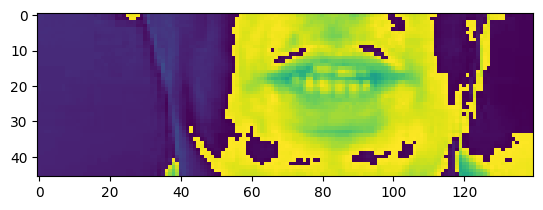

In [23]:
plt.imshow(frames[40])

In [24]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [25]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [26]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# 2. Create Data Pipeline

In [27]:
from matplotlib import pyplot as plt

In [28]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
train = data.take(450)
test = data.skip(450)

In [29]:
len(train)

450

In [30]:
frames, alignments = data.as_numpy_iterator().next()

In [31]:
len(frames)

2

In [32]:
sample = data.as_numpy_iterator()

In [33]:
val = sample.next(); val[0]

array([[[[[1.38044   ],
          [1.38044   ],
          [1.4550583 ],
          ...,
          [0.2611643 ],
          [0.22385512],
          [0.22385512]],

         [[1.38044   ],
          [1.38044   ],
          [1.4550583 ],
          ...,
          [0.2611643 ],
          [0.22385512],
          [0.22385512]],

         [[1.38044   ],
          [1.38044   ],
          [1.3431308 ],
          ...,
          [0.3357827 ],
          [0.2984735 ],
          [0.2984735 ]],

         ...,

         [[0.9700389 ],
          [0.9700389 ],
          [0.9700389 ],
          ...,
          [0.07461838],
          [0.07461838],
          [0.07461838]],

         [[0.9700389 ],
          [0.9700389 ],
          [0.9700389 ],
          ...,
          [0.03730919],
          [0.03730919],
          [0.03730919]],

         [[0.9700389 ],
          [0.9700389 ],
          [0.9700389 ],
          ...,
          [0.03730919],
          [0.03730919],
          [0.03730919]]],


        [[[1.3058

In [34]:
# imageio.mimsave('./animation.gif', val[0][0], fps=10)

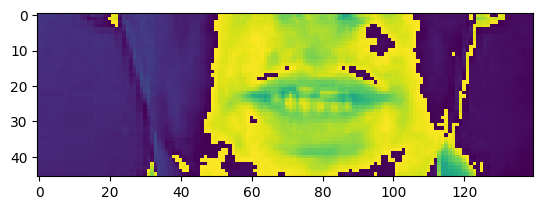

In [35]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][35])

In [36]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'place white by d six now'>

# 3. Design the Deep Neural Network

In [37]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [38]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [39]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [45]:
# url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
# url = 'https://drive.google.com/file/d/1fyZoYgqZw_aRa66kiOR6J8XLu3Y9wfMg/view?usp=sharing'
url = 'https://drive.google.com/u/0/uc?id=1JAmcd2v0JcZStgs69VytgqwGJMlhNeaT&export=download'
output = 'check.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('check.zip', 'models')

Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1JAmcd2v0JcZStgs69VytgqwGJMlhNeaT&export=download
From (redirected): https://drive.google.com/uc?id=1JAmcd2v0JcZStgs69VytgqwGJMlhNeaT&export=download&confirm=t&uuid=12248fe3-0f3e-4e6f-9f67-86c3c103778b
To: /kaggle/working/check.zip
100%|██████████| 95.3M/95.3M [00:03<00:00, 31.5MB/s]


['models/models/checkpoint',
 'models/models/checkpoint.index',
 'models/models/checkpoint.data-00000-of-00001']

In [47]:
model.load_weights('./models/models/checkpoint')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                    

In [49]:
5*17*75

6375

In [50]:
yhat = model.predict(val[0])

1/1 [==============================] - 5s 5s/step


In [51]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'place wwhiittee  bby       ssiiixx   nnoowww'>

In [52]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'place wwhiittee  bby       ssiiixx   nnoowww'>

In [53]:
model.input_shape

(None, 75, 46, 140, 1)

In [54]:
model.output_shape

(None, 75, 41)

# 4. Setup Training Options and Train

In [55]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [56]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [57]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [58]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.00001), loss=CTCLoss)

In [59]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 

In [60]:
schedule_callback = LearningRateScheduler(scheduler)

In [61]:
example_callback = ProduceExample(test)

In [62]:
model.fit(train, validation_data=test, epochs=46, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/46
169/450 [==========>...................] - ETA: 3:15 - loss: 5.2740

[mpeg1video @ 0x7fbdb000d1c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdb000d1c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 5.2137

[mpeg1video @ 0x7fbe0c017d80] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe0c017d80] Warning MVs not available
[mpeg1video @ 0x7fbf641f2300] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf641f2300] Warning MVs not available


1/1 [==============================] - 3s 3s/step
Original: place red in p three again
Prediction: place red in thre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay green with t three again
Prediction: lay gren with thre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 744s 2s/step - loss: 5.2137 - val_loss: 2.6833 - lr: 1.2246e-05
Epoch 2/46
 71/450 [===>..........................] - ETA: 4:29 - loss: 5.1794

[mpeg1video @ 0x7fbddc0a8b80] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbddc0a8b80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 5.1321

[mpeg1video @ 0x7fbeb0092540] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbeb0092540] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: set white by o nine soon
Prediction: set white by o nine son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay green in z five again
Prediction: lay gren in five again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 539s 1s/step - loss: 5.1321 - val_loss: 2.7730 - lr: 1.2246e-05
Epoch 3/46
309/450 [===================>..........] - ETA: 1:38 - loss: 5.0318

[mpeg1video @ 0x7fbdc0092640] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdc0092640] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 5.0286

[mpeg1video @ 0x7fbe000436c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe000436c0] Warning MVs not available


1/1 [==============================] - 0s 120ms/step
Original: set red at u five again
Prediction: set red at five again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place white with k five soon
Prediction: place white with five son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 535s 1s/step - loss: 5.0286 - val_loss: 2.6671 - lr: 1.2246e-05
Epoch 4/46
 89/450 [====>.........................] - ETA: 4:10 - loss: 4.9611

[mpeg1video @ 0x5618bc4be600] ac-tex damaged at 22 17
[mpeg1video @ 0x5618bc4be600] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 4.9753

[mpeg1video @ 0x7fbdc41eb040] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdc41eb040] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: bin blue with g three again
Prediction: bin blue with g thre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set red at h six please
Prediction: set red at h six please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 533s 1s/step - loss: 4.9753 - val_loss: 2.4756 - lr: 1.2246e-05
Epoch 5/46
363/450 [=======================>......] - ETA: 1:00 - loss: 4.8378

[mpeg1video @ 0x7fbf64019f80] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf64019f80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 4.8542

[mpeg1video @ 0x7fbdb0011d40] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdb0011d40] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: lay green by f eight now
Prediction: lay gren by eight now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place red with j nine soon
Prediction: place red with nine son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 532s 1s/step - loss: 4.8542 - val_loss: 2.4459 - lr: 1.2246e-05
Epoch 6/46
192/450 [===========>..................] - ETA: 2:59 - loss: 4.7620

[mpeg1video @ 0x7fbe1400f080] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe1400f080] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 4.7239

[mpeg1video @ 0x7fbf780ac200] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf780ac200] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: set white in h nine again
Prediction: set white in nine again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin green at u one again
Prediction: bin gren at one again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 530s 1s/step - loss: 4.7239 - val_loss: 2.5749 - lr: 1.2246e-05
Epoch 7/46
210/450 [=============>................] - ETA: 2:46 - loss: 4.7540

[mpeg1video @ 0x7fbd05cd8800] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbd05cd8800] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 4.6704

[mpeg1video @ 0x7fbe100789c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe100789c0] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: set green at p two please
Prediction: set gren at p two please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin red at f nine soon
Prediction: bin red at nine son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 530s 1s/step - loss: 4.6704 - val_loss: 2.3397 - lr: 1.2246e-05
Epoch 8/46
 60/450 [===>..........................] - ETA: 4:32 - loss: 4.3961

[mpeg1video @ 0x7fbdb000c5c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdb000c5c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 4.5729

[mpeg1video @ 0x7fbe000a8080] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe000a8080] Warning MVs not available


1/1 [==============================] - 0s 120ms/step
Original: lay red at r one soon
Prediction: lay red at one son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay red in d eight now
Prediction: lay red in d eight now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 530s 1s/step - loss: 4.5729 - val_loss: 2.4326 - lr: 1.2246e-05
Epoch 9/46
147/450 [========>.....................] - ETA: 3:29 - loss: 4.5537

[mpeg1video @ 0x7fbf8042b180] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf8042b180] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 4.5538

[mpeg1video @ 0x7fbc13b1ba00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbc13b1ba00] Warning MVs not available


1/1 [==============================] - 0s 119ms/step
Original: place green by k eight please
Prediction: place gren by eight please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place red at v eight now
Prediction: place red at v eight now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 528s 1s/step - loss: 4.5538 - val_loss: 2.2854 - lr: 1.2246e-05
Epoch 10/46
408/450 [==========================>...] - ETA: 29s - loss: 4.5661

[mpeg1video @ 0x7fbeb00a4140] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbeb00a4140] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 4.5261

[mpeg1video @ 0x7fbdac20bc40] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdac20bc40] Warning MVs not available


1/1 [==============================] - 0s 114ms/step
Original: bin green in a five again
Prediction: bin gren in a five again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place blue with x one soon
Prediction: place blue with x one son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 529s 1s/step - loss: 4.5261 - val_loss: 2.1919 - lr: 1.2246e-05
Epoch 11/46
163/450 [=========>....................] - ETA: 3:21 - loss: 4.5595

[mpeg1video @ 0x7fbe04048640] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe04048640] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 4.4498

[mpeg1video @ 0x7fbf6c0679c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf6c0679c0] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: bin blue in z one soon
Prediction: bin blue in z one son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set red by b six please
Prediction: set red by b six please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 532s 1s/step - loss: 4.4498 - val_loss: 2.2497 - lr: 1.2246e-05
Epoch 12/46
168/450 [==========>...................] - ETA: 3:16 - loss: 4.3368

[mpeg1video @ 0x7fbdbc0149c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdbc0149c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 4.3156

[mpeg1video @ 0x7fbe0c070bc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe0c070bc0] Warning MVs not available


1/1 [==============================] - 0s 121ms/step
Original: lay red with f three again
Prediction: lay red with thre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place white in j four please
Prediction: place white in j four please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 530s 1s/step - loss: 4.3156 - val_loss: 2.1456 - lr: 1.2246e-05
Epoch 13/46
198/450 [============>.................] - ETA: 2:54 - loss: 4.2967

[mpeg1video @ 0x7fbf840a2e00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf840a2e00] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 4.3023

[mpeg1video @ 0x7fbdd803b280] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdd803b280] Warning MVs not available


1/1 [==============================] - 0s 117ms/step
Original: bin green in n zero now
Prediction: bin gren in n zero now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place blue at v four please
Prediction: place blue at v four please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 530s 1s/step - loss: 4.3023 - val_loss: 2.1781 - lr: 1.2246e-05
Epoch 14/46
206/450 [============>.................] - ETA: 2:48 - loss: 4.2250

[mpeg1video @ 0x7fbf6c0493c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf6c0493c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 4.1881

[mpeg1video @ 0x7fbdb0084f80] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdb0084f80] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: lay blue by k five soon
Prediction: lay blue by k five son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin blue with t one again
Prediction: bin blue with t one again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 529s 1s/step - loss: 4.1881 - val_loss: 1.8220 - lr: 1.2246e-05
Epoch 15/46
 18/450 [>.............................] - ETA: 4:59 - loss: 4.8640

[mpeg1video @ 0x7fbe1402f640] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe1402f640] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 4.1526

[mpeg1video @ 0x7fbf74000bc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf74000bc0] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: set blue by u two please
Prediction: set blue by u two please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set blue at n five again
Prediction: set blue at n five again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 529s 1s/step - loss: 4.1526 - val_loss: 2.0990 - lr: 1.2246e-05
Epoch 16/46
 80/450 [====>.........................] - ETA: 4:16 - loss: 4.1440

[mpeg1video @ 0x7fbd05bddc00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbd05bddc00] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 4.0558

[mpeg1video @ 0x7fbe183ddc00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe183ddc00] Warning MVs not available


1/1 [==============================] - 0s 122ms/step
Original: place blue in b six now
Prediction: place blue in b six now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set green by x one again
Prediction: set gren by x one again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 530s 1s/step - loss: 4.0558 - val_loss: 1.8186 - lr: 1.2246e-05
Epoch 17/46
295/450 [==================>...........] - ETA: 1:47 - loss: 4.0680

[mpeg1video @ 0x7fbdb40720c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdb40720c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 4.0338

[mpeg1video @ 0x7fbe0c01d3c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe0c01d3c0] Warning MVs not available


1/1 [==============================] - 0s 114ms/step
Original: bin blue with m five soon
Prediction: bin blue with m five son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set red with i five again
Prediction: set red with i five again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 530s 1s/step - loss: 4.0338 - val_loss: 1.8875 - lr: 1.2246e-05
Epoch 18/46
252/450 [===============>..............] - ETA: 2:17 - loss: 3.9541

[mpeg1video @ 0x7fbf80403f00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf80403f00] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.9605

[mpeg1video @ 0x7fbdc416e000] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdc416e000] Warning MVs not available


1/1 [==============================] - 0s 120ms/step
Original: lay red by l two please
Prediction: lay red by l two please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place green by k seven soon
Prediction: place gren by seven son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 532s 1s/step - loss: 3.9605 - val_loss: 2.0343 - lr: 1.2246e-05
Epoch 19/46
349/450 [======================>.......] - ETA: 1:10 - loss: 3.8358

[mpeg1video @ 0x7fbf68053b40] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf68053b40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.8620

[mpeg1video @ 0x7fbdb0027a40] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdb0027a40] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: set red with c zero please
Prediction: set red with c zero please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place white by k zero now
Prediction: place white by k zero now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 534s 1s/step - loss: 3.8620 - val_loss: 1.9150 - lr: 1.2246e-05
Epoch 20/46
133/450 [=======>......................] - ETA: 3:41 - loss: 3.9868

[mpeg1video @ 0x7fbe0c08c740] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe0c08c740] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.8776

[mpeg1video @ 0x7fbf6c0ad2c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf6c0ad2c0] Warning MVs not available


1/1 [==============================] - 0s 119ms/step
Original: place white in x zero now
Prediction: place white in x zero now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place green at q six now
Prediction: place gren at q six now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 532s 1s/step - loss: 3.8776 - val_loss: 1.5901 - lr: 1.2246e-05
Epoch 21/46
189/450 [===========>..................] - ETA: 3:00 - loss: 3.8448

[mpeg1video @ 0x7fbdc4205840] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdc4205840] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.8377

[mpeg1video @ 0x7fbe10001740] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe10001740] Warning MVs not available


1/1 [==============================] - 0s 122ms/step
Original: lay green by f nine soon
Prediction: lay gren by f nine son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set red at u four please
Prediction: set red at u four please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 530s 1s/step - loss: 3.8377 - val_loss: 1.5290 - lr: 1.2246e-05
Epoch 22/46
143/450 [========>.....................] - ETA: 3:34 - loss: 3.7091

[mpeg1video @ 0x7fbdb05c4300] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdb05c4300] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.7183

[mpeg1video @ 0x7fbddc0d3740] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbddc0d3740] Warning MVs not available


1/1 [==============================] - 0s 120ms/step
Original: set white at o six please
Prediction: set white at o six please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin green at h two please
Prediction: bin gren at t two please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 537s 1s/step - loss: 3.7183 - val_loss: 1.7072 - lr: 1.2246e-05
Epoch 23/46
423/450 [===========================>..] - ETA: 18s - loss: 3.6501

[mpeg1video @ 0x7fbf75db4800] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf75db4800] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.6493

[mpeg1video @ 0x7fbdb8078140] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdb8078140] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: set white in h seven soon
Prediction: set white in h seven son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place white at d three soon
Prediction: place white at d thre son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 536s 1s/step - loss: 3.6493 - val_loss: 1.5772 - lr: 1.2246e-05
Epoch 24/46
390/450 [=========================>....] - ETA: 42s - loss: 3.6815

[mpeg1video @ 0x7fbe14033580] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe14033580] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.6521

[mpeg1video @ 0x7fbf8006b680] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf8006b680] Warning MVs not available


1/1 [==============================] - 0s 121ms/step
Original: place blue in o four now
Prediction: place blue in o four now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay white at z zero now
Prediction: lay white at z zero now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 537s 1s/step - loss: 3.6521 - val_loss: 1.3235 - lr: 1.2246e-05
Epoch 25/46
405/450 [==========================>...] - ETA: 31s - loss: 3.5769

[mpeg1video @ 0x7fbdd4003ec0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdd4003ec0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.6083

[mpeg1video @ 0x7fbf68086d00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf68086d00] Warning MVs not available


1/1 [==============================] - 0s 121ms/step
Original: lay red by l one soon
Prediction: lay red by l one son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin white by h one again
Prediction: bin white by h one again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 537s 1s/step - loss: 3.6083 - val_loss: 1.3979 - lr: 1.2246e-05
Epoch 26/46
366/450 [=======================>......] - ETA: 58s - loss: 3.5868

[mpeg1video @ 0x7fbdb8043480] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdb8043480] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.5716

[mpeg1video @ 0x7fbe0001c0c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe0001c0c0] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: bin blue in r seven soon
Prediction: bin blue in r seven son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin green with b five soon
Prediction: bin gren with b five son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 530s 1s/step - loss: 3.5716 - val_loss: 1.3331 - lr: 1.2246e-05
Epoch 27/46
346/450 [======================>.......] - ETA: 1:12 - loss: 3.4658

[mpeg1video @ 0x7fbf7c0c6d40] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf7c0c6d40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.4204

[mpeg1video @ 0x7fbd059b9e40] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbd059b9e40] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: set white with p two now
Prediction: set white with p two now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place white by k one soon
Prediction: place white by k one son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 529s 1s/step - loss: 3.4204 - val_loss: 1.2439 - lr: 1.2246e-05
Epoch 28/46
353/450 [======================>.......] - ETA: 1:07 - loss: 3.4302

[mpeg1video @ 0x7fbeb019a000] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbeb019a000] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.4211

[mpeg1video @ 0x7fbdb4060340] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdb4060340] Warning MVs not available


1/1 [==============================] - 0s 117ms/step
Original: place blue with x three again
Prediction: place blue with x thre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay red with f one soon
Prediction: lay red with f one son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 530s 1s/step - loss: 3.4211 - val_loss: 1.4693 - lr: 1.2246e-05
Epoch 29/46
 88/450 [====>.........................] - ETA: 4:11 - loss: 3.5110

[mpeg1video @ 0x7fbe080611c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe080611c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.3457

[mpeg1video @ 0x7fbf75eb4c80] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf75eb4c80] Warning MVs not available


1/1 [==============================] - 0s 121ms/step
Original: set red by b four now
Prediction: set red by b four now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place green by y six please
Prediction: place gren by y six please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 529s 1s/step - loss: 3.3457 - val_loss: 1.3107 - lr: 1.2246e-05
Epoch 30/46
316/450 [====================>.........] - ETA: 1:33 - loss: 3.4248

[mpeg1video @ 0x7fbd0896b440] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbd0896b440] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.3678

[mpeg1video @ 0x7fbeb003a940] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbeb003a940] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: place blue in i two please
Prediction: place blue in i two please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay red at y four now
Prediction: lay red at y four now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 532s 1s/step - loss: 3.3678 - val_loss: 1.2599 - lr: 1.2246e-05
Epoch 31/46
117/450 [======>.......................] - ETA: 3:52 - loss: 3.1613

[mpeg1video @ 0x7fbdc0014880] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdc0014880] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.2488

[mpeg1video @ 0x7fbe0c008480] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe0c008480] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: place green at k four please
Prediction: place gren at k four please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set green with p eight now
Prediction: set gren with p eight now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 530s 1s/step - loss: 3.2488 - val_loss: 1.3006 - lr: 1.1080e-05
Epoch 32/46
258/450 [================>.............] - ETA: 2:12 - loss: 3.2517

[mpeg1video @ 0x7fbf80045bc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf80045bc0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.2357

[mpeg1video @ 0x7fbdc422bf00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdc422bf00] Warning MVs not available


1/1 [==============================] - 0s 123ms/step
Original: place red in c four please
Prediction: place red in c four please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place blue in i one soon
Prediction: place blue in i one son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 531s 1s/step - loss: 3.2357 - val_loss: 1.4156 - lr: 1.0026e-05
Epoch 33/46
358/450 [======================>.......] - ETA: 1:03 - loss: 3.1031

[mpeg1video @ 0x7fbf680866c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf680866c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.1733

[mpeg1video @ 0x7fbdb0008340] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdb0008340] Warning MVs not available


1/1 [==============================] - 0s 118ms/step
Original: bin red by t three again
Prediction: bin red by t thre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay white at l four please
Prediction: lay white at l four please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 529s 1s/step - loss: 3.1733 - val_loss: 1.1682 - lr: 9.0718e-06
Epoch 34/46
206/450 [============>.................] - ETA: 2:48 - loss: 3.1007

[mpeg1video @ 0x7fbe0c062f80] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe0c062f80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.1393

[mpeg1video @ 0x7fbf75de0cc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf75de0cc0] Warning MVs not available


1/1 [==============================] - 0s 122ms/step
Original: place red at j two please
Prediction: place red at j two please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place green by k six now
Prediction: place gren by k six now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 529s 1s/step - loss: 3.1393 - val_loss: 1.2601 - lr: 8.2085e-06
Epoch 35/46
400/450 [=========================>....] - ETA: 34s - loss: 3.0943

[mpeg1video @ 0x7fbc13b16880] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbc13b16880] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.1090

[mpeg1video @ 0x7fbe18004d00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe18004d00] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: bin white by a five soon
Prediction: bin white by a five son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place red with x eight please
Prediction: place red with x eight please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 529s 1s/step - loss: 3.1090 - val_loss: 1.1206 - lr: 7.4273e-06
Epoch 36/46
293/450 [==================>...........] - ETA: 1:49 - loss: 2.9560

[mpeg1video @ 0x7fbdb0481d40] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdb0481d40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 2.9874

[mpeg1video @ 0x7fbddc1e70c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbddc1e70c0] Warning MVs not available


1/1 [==============================] - 0s 123ms/step
Original: bin blue at l eight please
Prediction: bin blue at l eight please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set green in o seven soon
Prediction: set gren in o seven son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 530s 1s/step - loss: 2.9874 - val_loss: 1.3359 - lr: 6.7205e-06
Epoch 37/46
 44/450 [=>............................] - ETA: 4:41 - loss: 3.0787

[mpeg1video @ 0x7fbf75dbaa40] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf75dbaa40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.0282

[mpeg1video @ 0x7fbdbc05fa00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdbc05fa00] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: set blue in n zero please
Prediction: set blue in n zero please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin red with g nine again
Prediction: bin red with g nine again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 529s 1s/step - loss: 3.0282 - val_loss: 1.0365 - lr: 6.0810e-06
Epoch 38/46
235/450 [==============>...............] - ETA: 2:28 - loss: 3.0233

[mpeg1video @ 0x7fbe100aeb00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe100aeb00] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 3.0131

[mpeg1video @ 0x7fbf7c213b40] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf7c213b40] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: place red by p nine soon
Prediction: place red by p nine son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay blue in q zero now
Prediction: lay blue in q zero now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 529s 1s/step - loss: 3.0131 - val_loss: 1.1646 - lr: 5.5023e-06
Epoch 39/46
102/450 [=====>........................] - ETA: 4:02 - loss: 2.9749

[mpeg1video @ 0x7fbddc090440] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbddc090440] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 2.9787

[mpeg1video @ 0x7fbe9808bf40] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe9808bf40] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: set red by u eight please
Prediction: set red by u eight please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay red at y six please
Prediction: lay red at y six please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 529s 1s/step - loss: 2.9787 - val_loss: 1.0505 - lr: 4.9787e-06
Epoch 40/46
255/450 [================>.............] - ETA: 2:15 - loss: 3.0243

[mpeg1video @ 0x7fbdc005b440] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdc005b440] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 2.9101

[mpeg1video @ 0x7fbe0c0fc800] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe0c0fc800] Warning MVs not available


1/1 [==============================] - 0s 114ms/step
Original: set blue in m nine soon
Prediction: set blue in m nine son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin red with t four now
Prediction: bin red with t four now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 528s 1s/step - loss: 2.9101 - val_loss: 1.0040 - lr: 4.5049e-06
Epoch 41/46
224/450 [=============>................] - ETA: 2:36 - loss: 3.0213

[mpeg1video @ 0x7fbf80091ac0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf80091ac0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 2.9357

[mpeg1video @ 0x7fbdc4181b40] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdc4181b40] Warning MVs not available


1/1 [==============================] - 0s 118ms/step
Original: place white by q six please
Prediction: place white by q six please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set green in o eight please
Prediction: set gren in o eight please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 529s 1s/step - loss: 2.9357 - val_loss: 1.0662 - lr: 4.0762e-06
Epoch 42/46
112/450 [======>.......................] - ETA: 3:54 - loss: 2.8908

[mpeg1video @ 0x7fbf64078e80] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf64078e80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 2.9135

[mpeg1video @ 0x7fbdb0065640] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdb0065640] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: bin white by t seven soon
Prediction: bin white by t seven son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set blue in t five again
Prediction: set blue in t five again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 530s 1s/step - loss: 2.9135 - val_loss: 1.1787 - lr: 3.6883e-06
Epoch 43/46
101/450 [=====>........................] - ETA: 4:02 - loss: 2.8074

[mpeg1video @ 0x7fbe000a4780] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe000a4780] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 2.8363

[mpeg1video @ 0x7fbf80087080] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf80087080] Warning MVs not available


1/1 [==============================] - 0s 122ms/step
Original: lay blue in j seven soon
Prediction: lay blue in j seven son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set red at o one again
Prediction: set red at o one again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 529s 1s/step - loss: 2.8363 - val_loss: 1.0196 - lr: 3.3373e-06
Epoch 44/46
167/450 [==========>...................] - ETA: 3:17 - loss: 2.8182

[mpeg1video @ 0x7fbc13b26c00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbc13b26c00] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 2.8241

[mpeg1video @ 0x7fbe9802c800] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe9802c800] Warning MVs not available


1/1 [==============================] - 0s 117ms/step
Original: place white at x four now
Prediction: place white at x four now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place white with k seven again
Prediction: place white with k seven again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 532s 1s/step - loss: 2.8241 - val_loss: 0.9925 - lr: 3.0197e-06
Epoch 45/46
391/450 [=========================>....] - ETA: 40s - loss: 2.8155

[mpeg1video @ 0x7fbda0095f40] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbda0095f40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 2.8608

[mpeg1video @ 0x7fbdd842f4c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdd842f4c0] Warning MVs not available


1/1 [==============================] - 0s 120ms/step
Original: place red by x three soon
Prediction: place red by x thre son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set white with v six now
Prediction: set white with v six now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 528s 1s/step - loss: 2.8608 - val_loss: 1.1915 - lr: 2.7324e-06
Epoch 46/46
160/450 [=========>....................] - ETA: 3:21 - loss: 2.8397

[mpeg1video @ 0x7fbf800f5f80] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbf800f5f80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 2.7980

[mpeg1video @ 0x7fbdbc027c00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbdbc027c00] Warning MVs not available


1/1 [==============================] - 0s 131ms/step
Original: bin white in m six please
Prediction: bin white in m six please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin green by u five again
Prediction: bin gren by u five again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 529s 1s/step - loss: 2.7980 - val_loss: 0.9335 - lr: 2.4723e-06


# 5. Make a Prediction 

In [63]:
# url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
# output = 'checkpoints.zip'
# gdown.download(url, output, quiet=False)
# gdown.extractall('checkpoints.zip', 'models')

In [64]:
# model.load_weights('./models/checkpoint')

In [65]:
test_data = test.as_numpy_iterator()

In [66]:
sample = test_data.next()

[mpeg1video @ 0x7fbe10012a00] ac-tex damaged at 22 17
[mpeg1video @ 0x7fbe10012a00] Warning MVs not available


In [67]:
sample[0].shape

(2, 75, 46, 140, 1)

In [68]:
sample[1].shape

(2, 40)

In [69]:
sample[1]

array([[12,  1, 25, 39,  2, 12, 21,  5, 39,  1, 20, 39, 17, 39, 19,  9,
        24, 39, 16, 12,  5,  1, 19,  5,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [12,  1, 25, 39, 18,  5,  4, 39, 23,  9, 20,  8, 39, 12, 39,  6,
        15, 21, 18, 39, 14, 15, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]])

In [70]:
yhat = model.predict(sample[0])

1/1 [==============================] - 0s 131ms/step


In [71]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'lay blue at q six please'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay red with l four now'>]

In [72]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [73]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'lay blue at q six please'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay red with l four now'>]

# Test on a Video

In [74]:
sample = load_data(tf.convert_to_tensor('./data/s1/bras9a.mpg'))

In [75]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [76]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 1s 513ms/step


In [77]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [78]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]